<a href="https://colab.research.google.com/github/igormartins0301/ProjetosCompletos/blob/main/regressao_wallmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entendendo o problema


Uma das principais lojas de varejo dos EUA, o Walmart, gostaria de prever as vendas e a demanda com precisão. Existem certos eventos e feriados que afetam as vendas a cada dia. Existem dados de vendas disponíveis para 45 lojas do Walmart. 

O Walmart realiza vários eventos promocionais de descontos ao longo do ano. Essas remarcações precedem feriados importantes, os quatro maiores de todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. 

Objetivo:
- Entenda o conjunto de dados e a limpeza 
- Criar uma análise exploratória e estatística

### Entendendo as colunas

- Store - o número da loja
- Date - a semana de vendas
- Weekly_Sales - vendas para a loja especificada
- Holiday_Flag - se a semana é um feriado especial semana 1 – Semana de feriado 0 – Semana sem feriado
- Temperature - Temperatura no dia da venda
- Fuel_Price - Custo do combustível na região
- CPI – Índice de preços ao consumidor prevalecente
- Unemployment - Taxa de desemprego prevalecente
- Holiday Events
    - Super Bowl: 12-fev-10, 11-fev-11, 10-fev-12, 8-fev-13\
    - Labor Day: 10-set-10, 9-set-11, 7-set-12 , 6-Set-13\
    - Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
    - Christmas: 31-Dez-10, 30-Dez-11, 28-Dez -12, 27-dez-13

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from summarytools import dfSummary
from IPython.display import Image
from IPython.core.display import HTML
import math
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import RobustScaler, StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error



In [ ]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

def ml_error( model_name, y, y_pred ):
    mae = mean_absolute_error( y, y_pred )
    mape = mean_absolute_percentage_error( y, y_pred )
    rmse = np.sqrt( mean_squared_error( y, y_pred ) )
    return pd.DataFrame( { 'Model Name': model_name,

    'MAE': mae,
    'MAPE': mape,
    'RMSE': rmse }, index=[0] )

In [ ]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Igor\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Carregando o Dataset

In [ ]:
df = pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Tratamento dos dados

In [ ]:
#Modificando o nome das colunas para facilitar entendimento
df.columns = ['loja', 'data','venda_semanal','semana_com_feriado','temperatura','preco_gasolina','CPI','taxa_desemprego']


In [ ]:
#Dimensão dos dados
print(f'número de linhas: {df.shape[0]}')
print(f'número de colunas: {df.shape[1]}')

número de linhas: 6435
número de colunas: 8


In [ ]:
#Tipo de dado de cada coluna
df.dtypes

loja                    int64
data                   object
venda_semanal         float64
semana_com_feriado      int64
temperatura           float64
preco_gasolina        float64
CPI                   float64
taxa_desemprego       float64
dtype: object

In [ ]:
#Transformando a coluna data em tipo data
df["data"] = pd.to_datetime(df["data"])

C:\Users\Igor\AppData\Local\Temp\ipykernel_14888\3423149224.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["data"] = pd.to_datetime(df["data"])


In [ ]:
#Conhecendo os dados Nulos
df.isna().sum()

loja                  0
data                  0
venda_semanal         0
semana_com_feriado    0
temperatura           0
preco_gasolina        0
CPI                   0
taxa_desemprego       0
dtype: int64

# Estatística Descritiva

In [ ]:
num_attributes = df[['venda_semanal','temperatura','preco_gasolina','CPI','taxa_desemprego']]

### Estatística descritiva dos dados

In [ ]:
# Medidas de tendência central - média, mediana
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
# Medidas de dispersão - 'min', 'max', 'range', 'desvio padrão','skew', 'kurtosis'
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T
# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['Colunas', 'min', 'max', 'range', 'média', 'mediana', 'desvio padrão','skew', 'kurtosis']
m

,Colunas,min,max,range,média,mediana,desvio padrão,skew,kurtosis
0,venda_semanal,209986.250,3.818686e+06,3.608700e+06,1.046965e+06,960746.040000,564322.769020,0.668362,0.053141
1,temperatura,-2.060,1.001400e+02,1.022000e+02,6.066378e+01,62.670000,18.443500,-0.336768,-0.612801
2,preco_gasolina,2.472,4.468000e+00,1.996000e+00,3.358607e+00,3.445000,0.458984,-0.096158,-1.177378
3,CPI,126.064,2.272328e+02,1.011688e+02,1.715784e+02,182.616521,39.353654,0.063492,-1.839813
4,taxa_desemprego,3.879,1.431300e+01,1.043400e+01,7.999151e+00,7.874000,1.875739,1.188144,2.639712


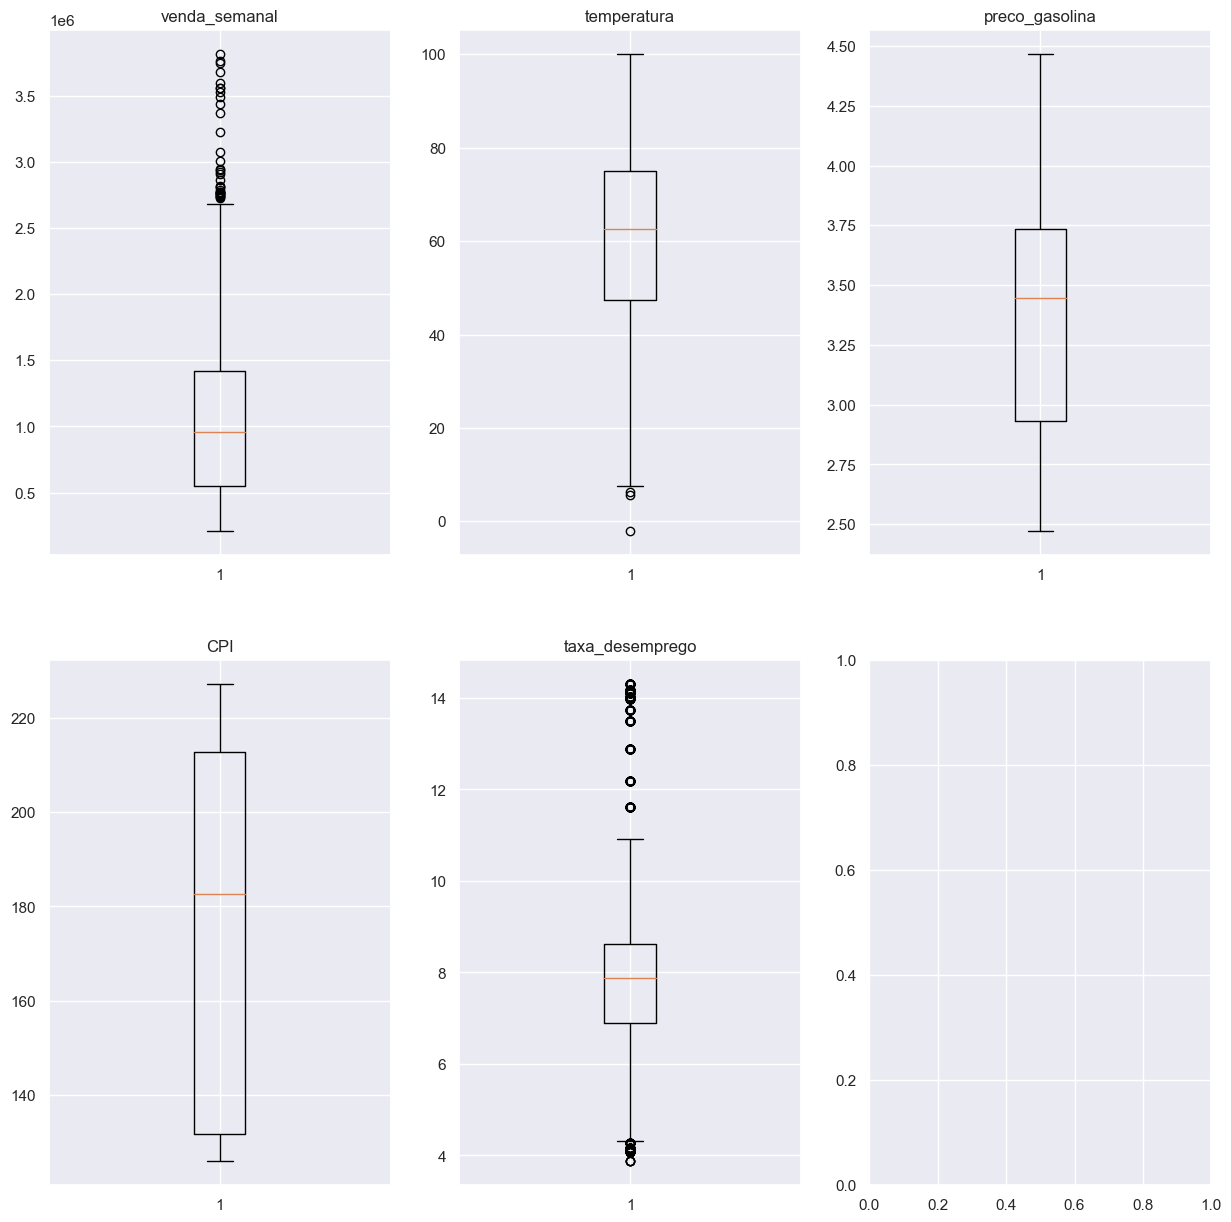

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,15))

# criar uma lista com o nome das variáveis
variaveis = ['venda_semanal','temperatura','preco_gasolina','CPI','taxa_desemprego']

# loop para criar um boxplot para cada variável
for i, var in enumerate(variaveis):
    row = i // 3  # calcular a linha do subplot
    col = i % 3   # calcular a coluna do subplot
    axs[row, col].boxplot(df[var])
    axs[row, col].set_title(var)

# exibir o gráfico
plt.show()

# Feature Engineering

In [ ]:
super_bowl = ['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013']
condicoes = [df['data'] == x for x in super_bowl]
classificacao = [1] * len(super_bowl)
df['super_bowl'] = np.select(condicoes, classificacao, default=0)

labor_day = ['10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013']
condicoes = [df['data'] == x for x in labor_day]
classificacao = [1] * len(labor_day)
df['labor_day'] = np.select(condicoes, classificacao, default=0)

thanksgiving = ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']
condicoes = [df['data'] == x for x in thanksgiving]
classificacao = [1] * len(thanksgiving)
df['thanksgiving'] = np.select(condicoes, classificacao, default=0)

christmas = ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']
condicoes = [df['data'] == x for x in christmas]
classificacao = [1] * len(christmas)
df['labor_day'] = np.select(condicoes, classificacao, default=0)



C:\Users\Igor\AppData\Local\Temp\ipykernel_14888\424300291.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  condicoes = [df['data'] == x for x in thanksgiving]
C:\Users\Igor\AppData\Local\Temp\ipykernel_14888\424300291.py:17: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  condicoes = [df['data'] == x for x in christmas]


# Análise exploratória dos dados

### Análise Univariada dos dados

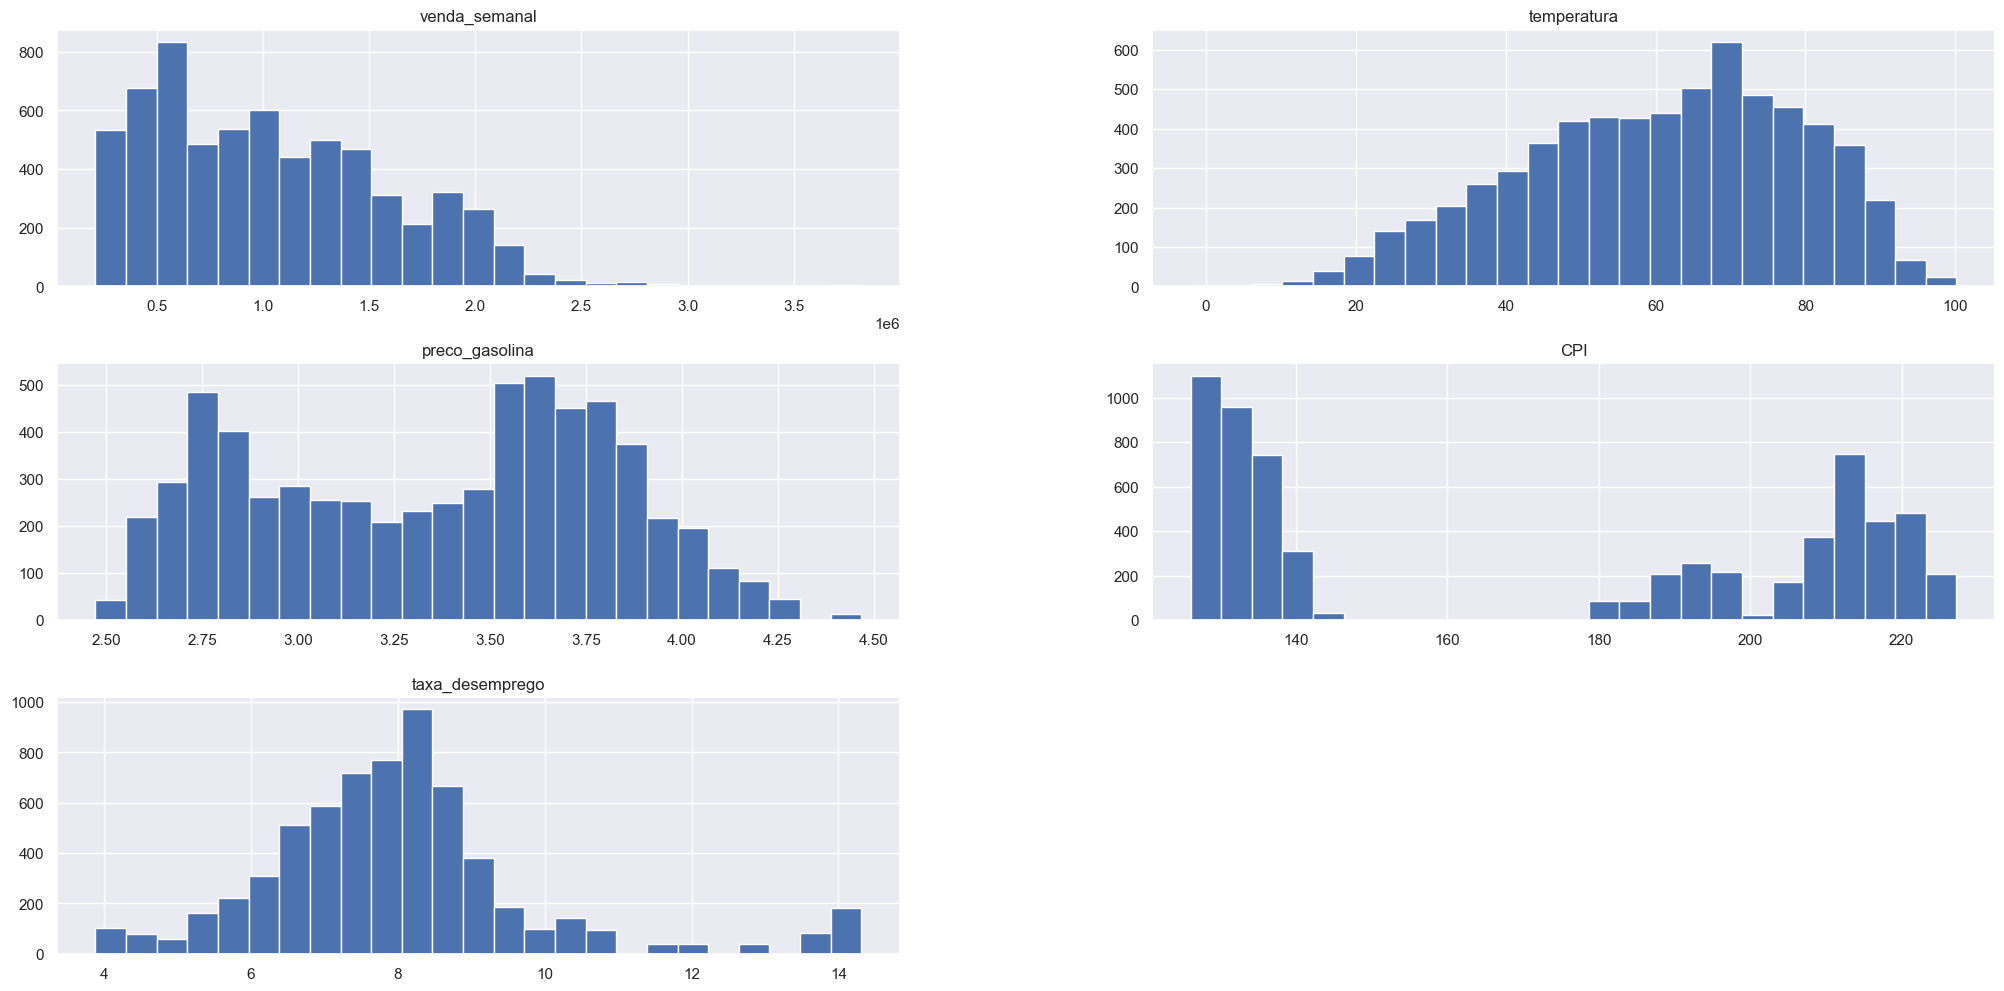

In [ ]:
#Distribuição dos dados numéricos
num_attributes.hist( bins=25 );

### Análise Bivariada

Semanas com feriado vendem mais??

<AxesSubplot: xlabel='semana_com_feriado', ylabel='venda_semanal'>

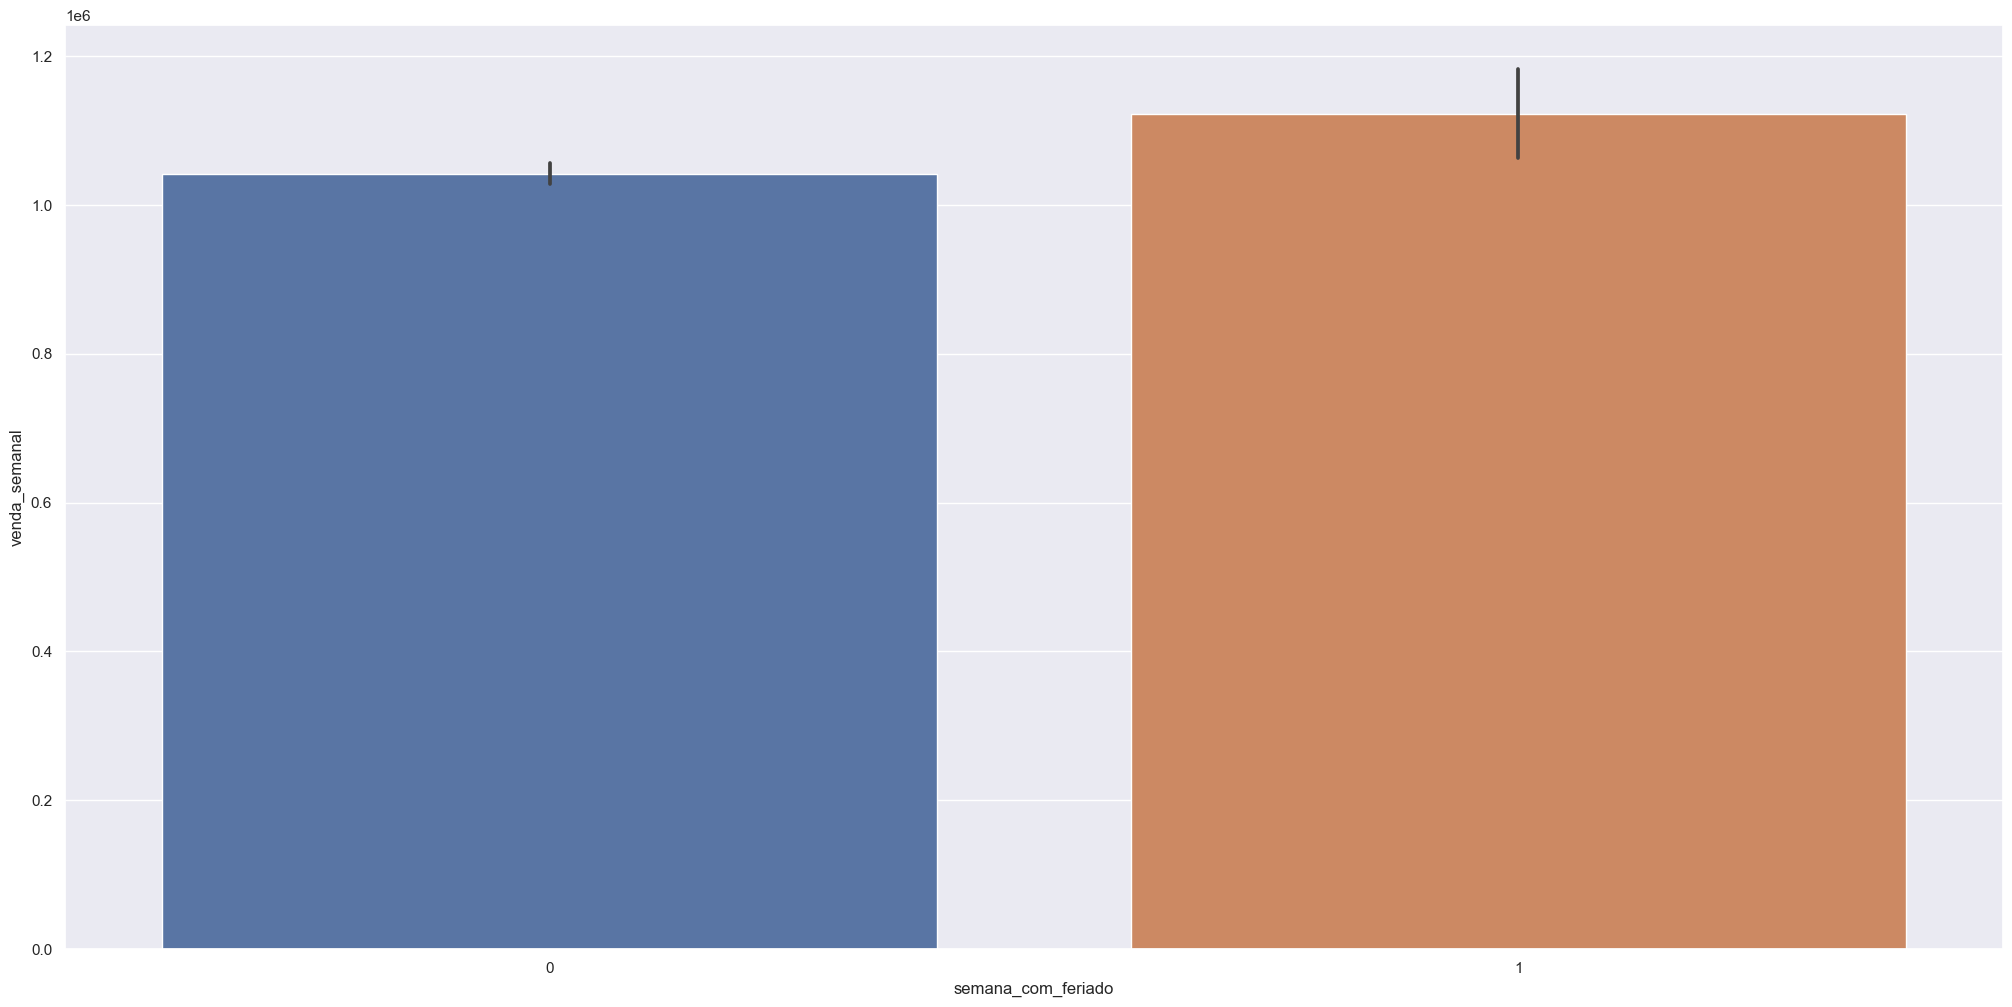

In [ ]:
#Podemos verificar que semanas com feriado vendem mais.
sns.barplot(data=df, x='semana_com_feriado', y='venda_semanal')

Semanas com a temperatura mais alta vendem mais? 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


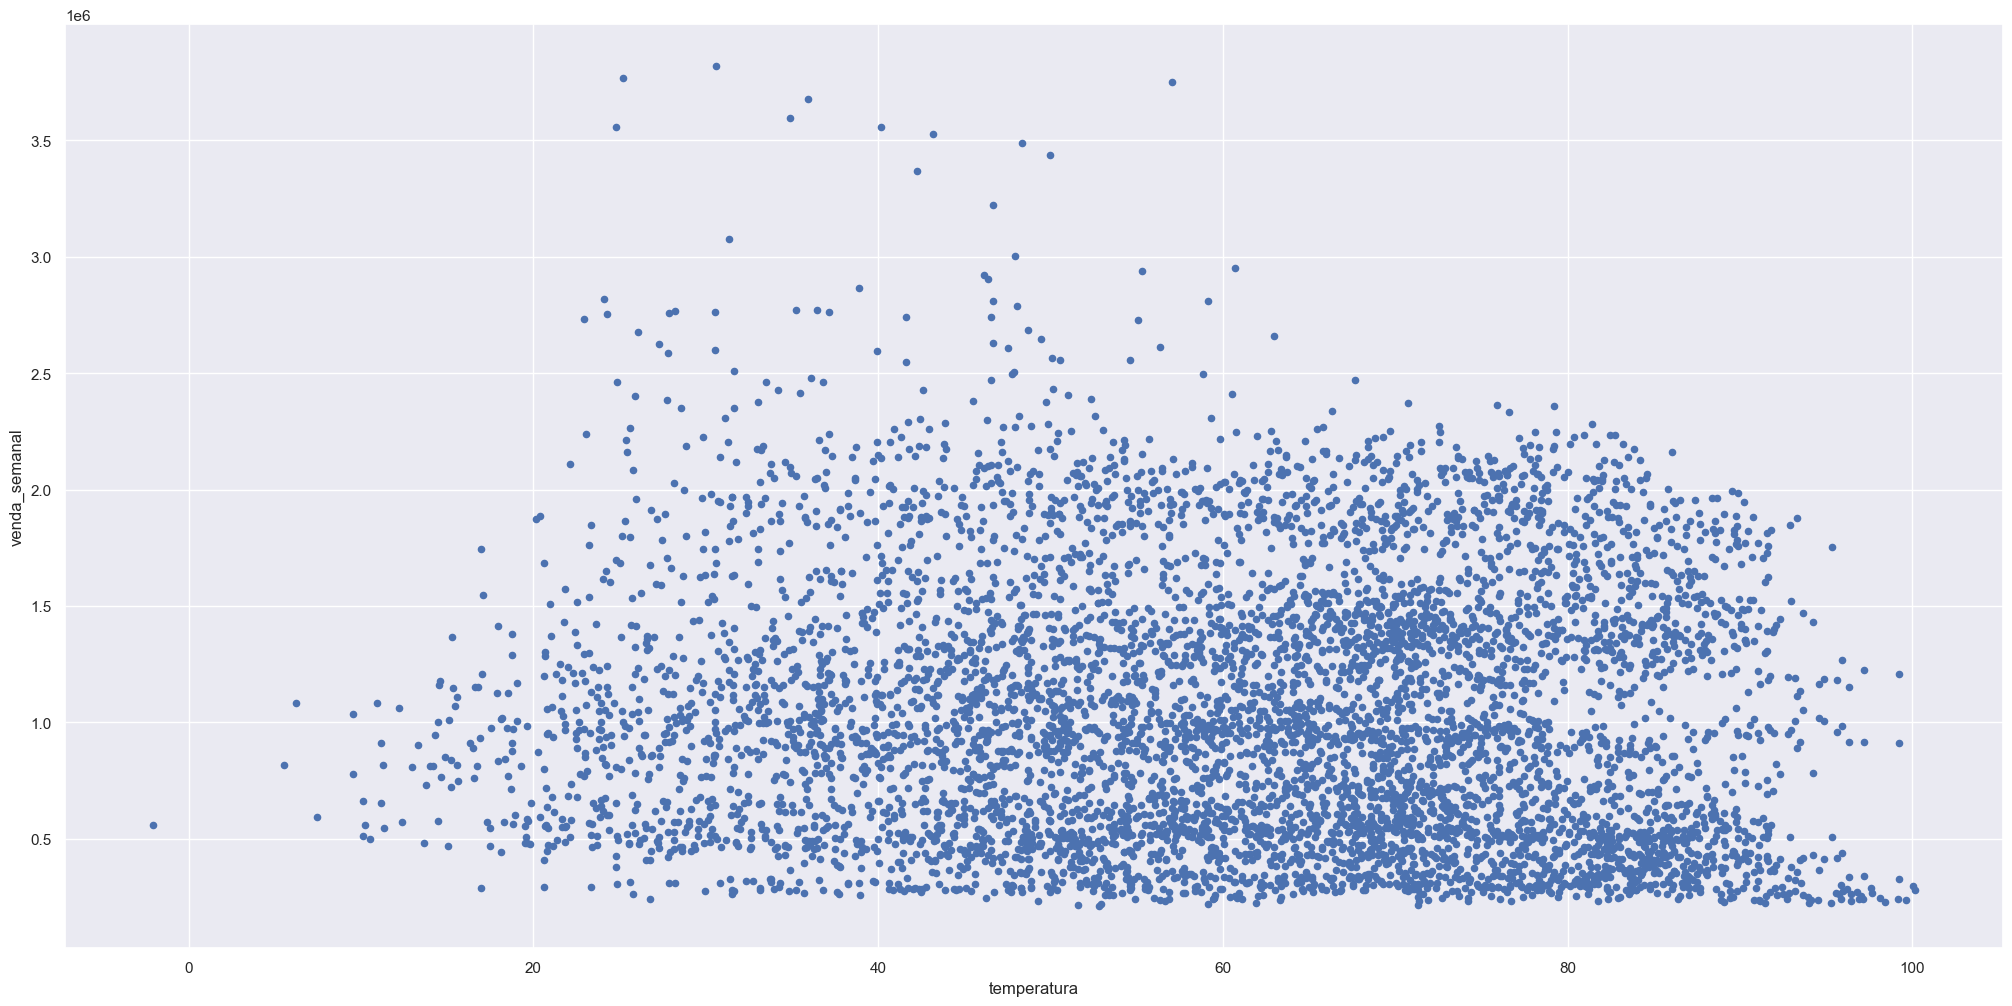

In [ ]:
#Avaliando a correlaçao entre a temperatura e venda_semanal
df.plot.scatter(x='temperatura', y='venda_semanal');
plt.show();

Quanto maior o preço dos combustíveis menor a quantidade de vendas? 


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


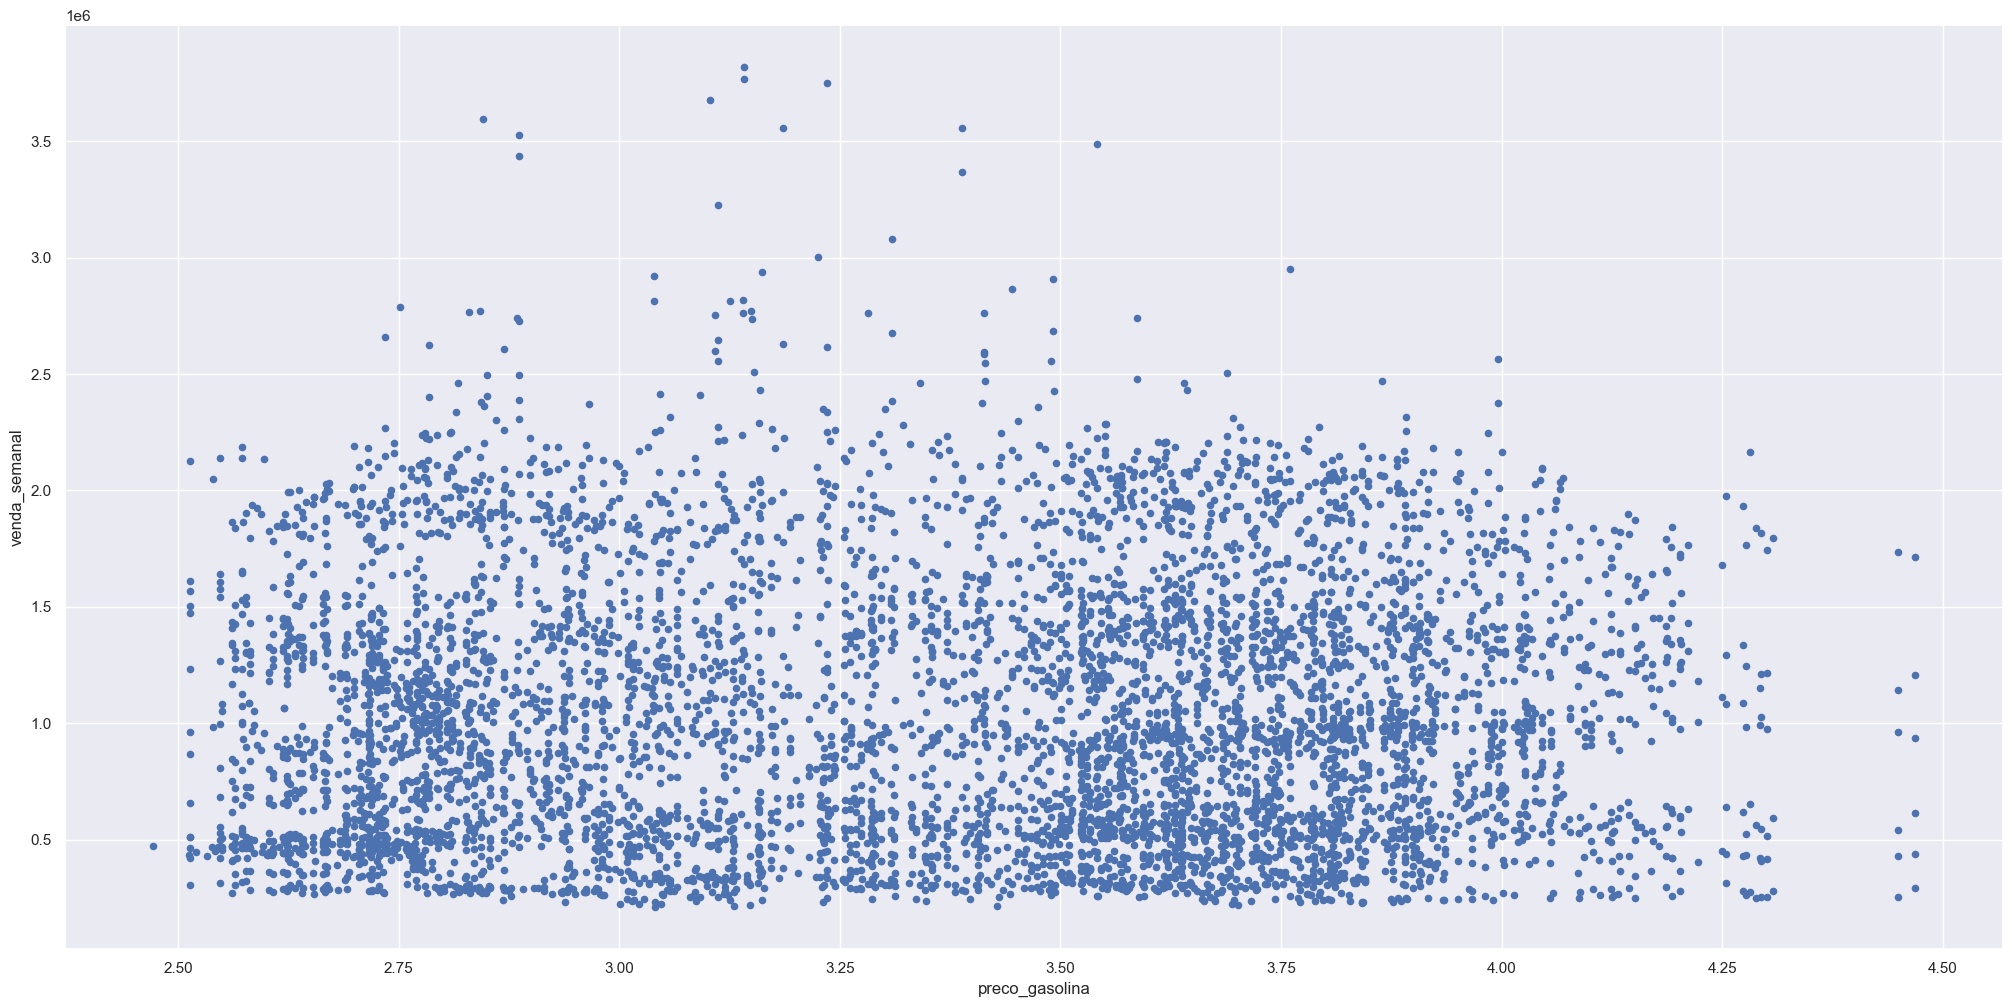

In [ ]:
#Avaliando a correlaçao entre o preço da gasolina e venda_semanal podemos ver que há uma distribuição igual
df.plot.scatter(x='preco_gasolina', y='venda_semanal');
plt.show();

Épocas em que a taxa de juros está mais alta indica uma resseção econômica, isso reflete nas vendas do Walmart? Quanto maior a taxa menor o valor vendido?


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


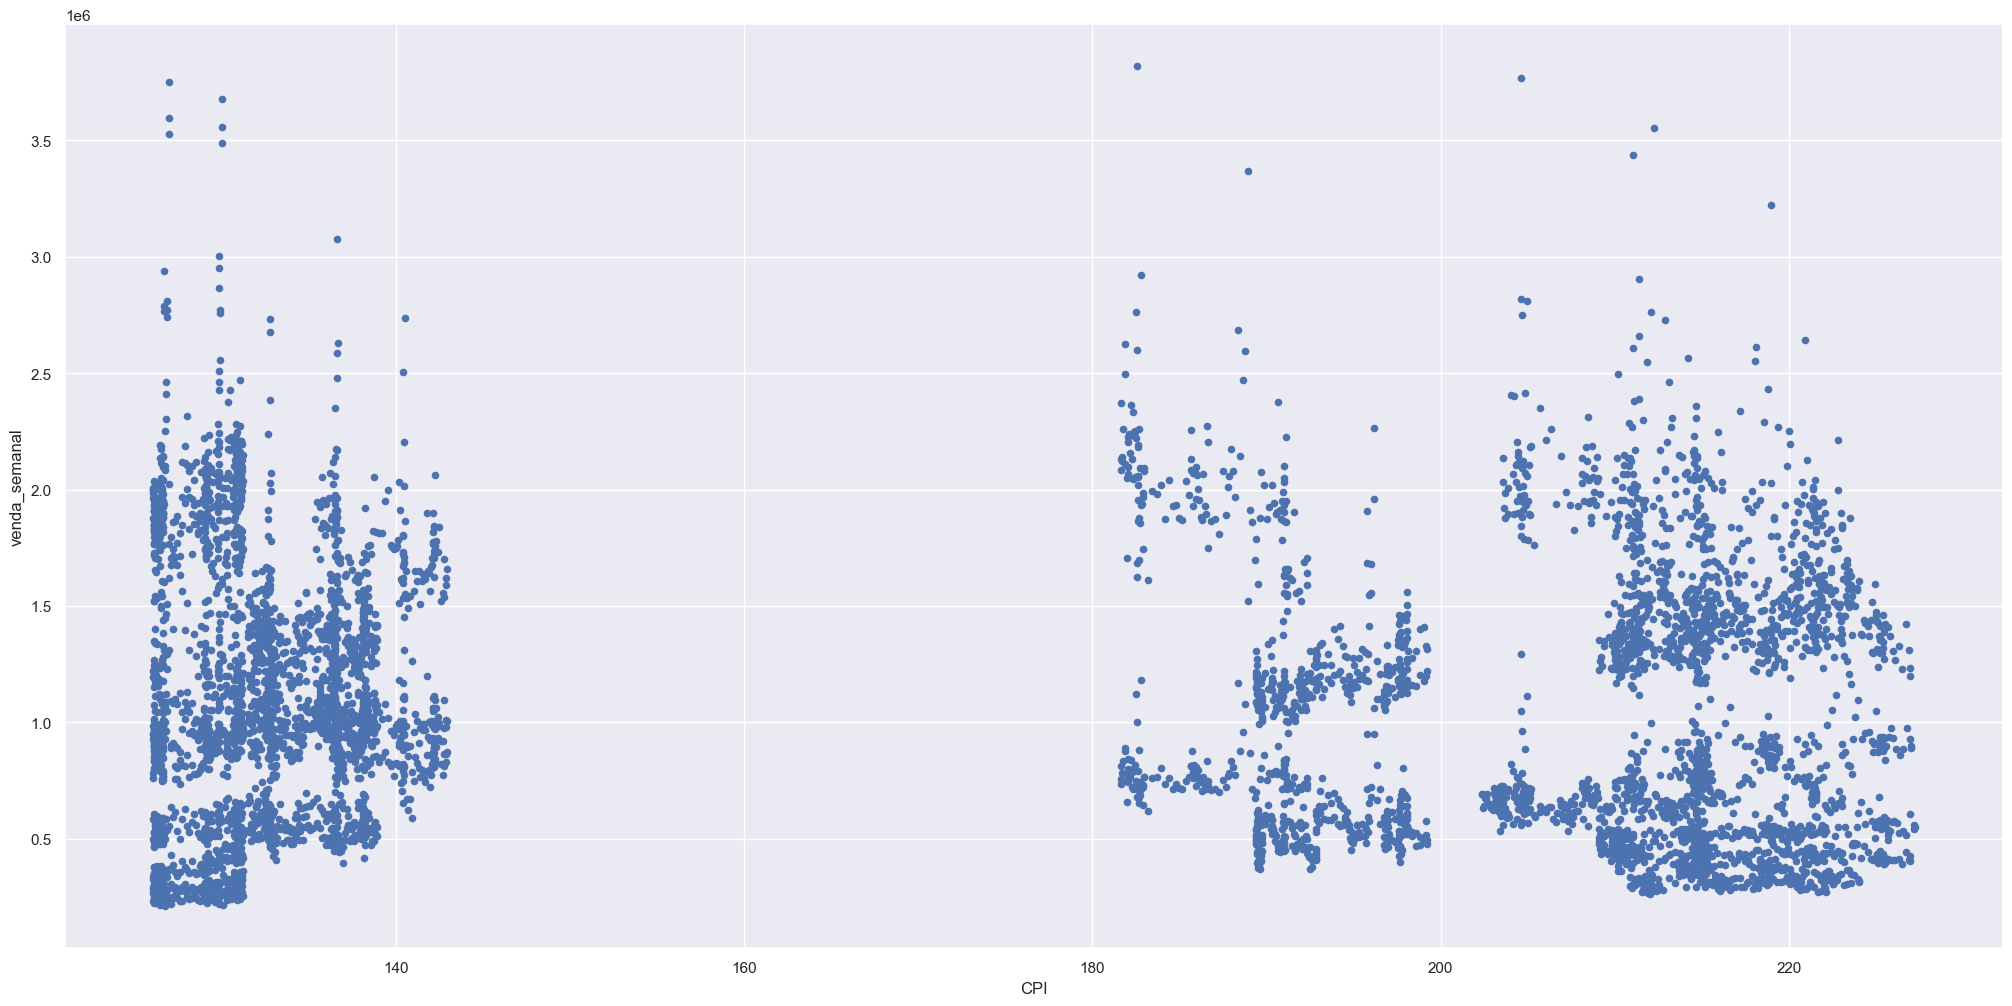

In [ ]:
df.plot.scatter(x='CPI', y='venda_semanal');
plt.show();

Outra forma de medirmos o período econômico é avaliando a taxa de desemprego, quanto maior a taxa, teoricamente seriam menores as vendas do Walmart, isso é confirmado pelos dados? 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


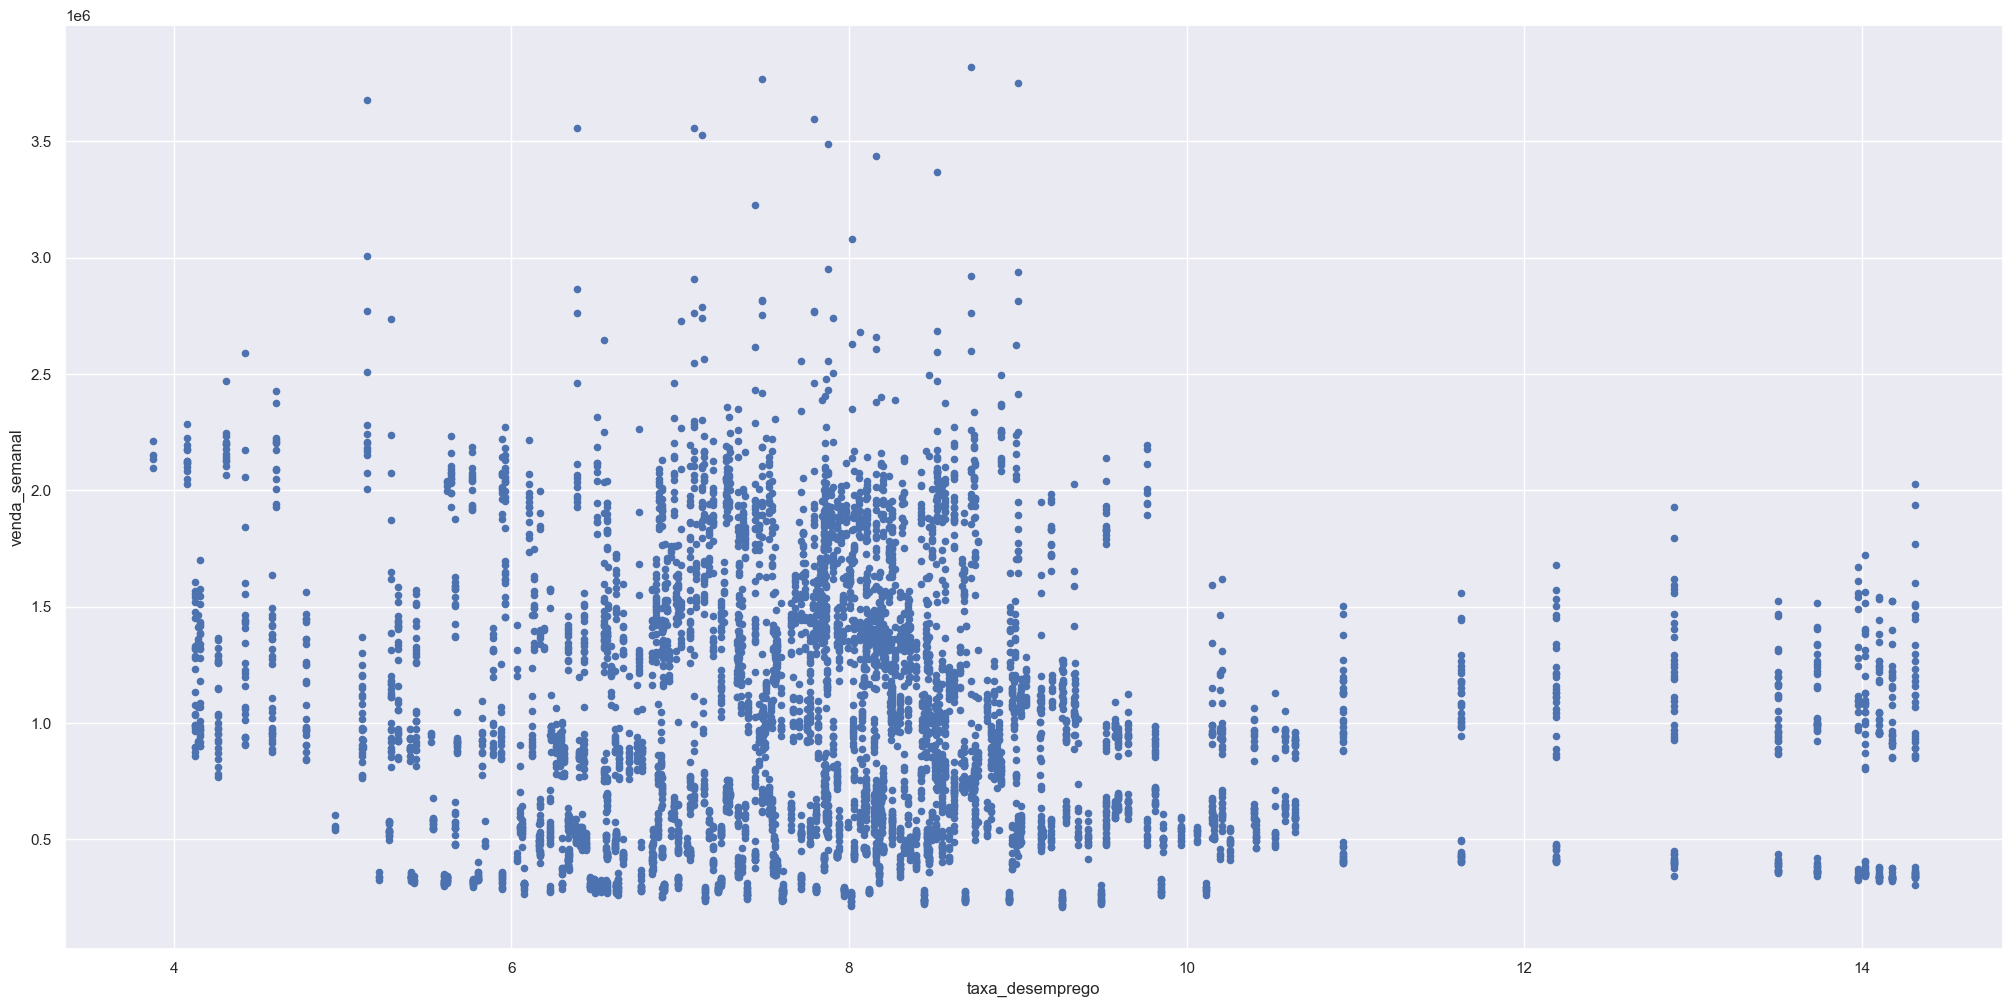

In [ ]:
#Avaliando a relação entre desemprego e vendas, quanto maior a taxa, menor as vendas.
df.plot.scatter(x='taxa_desemprego', y='venda_semanal');
plt.show();

Qual semestre e trimestre vende mais?

<AxesSubplot: xlabel='semestre', ylabel='venda_semanal'>

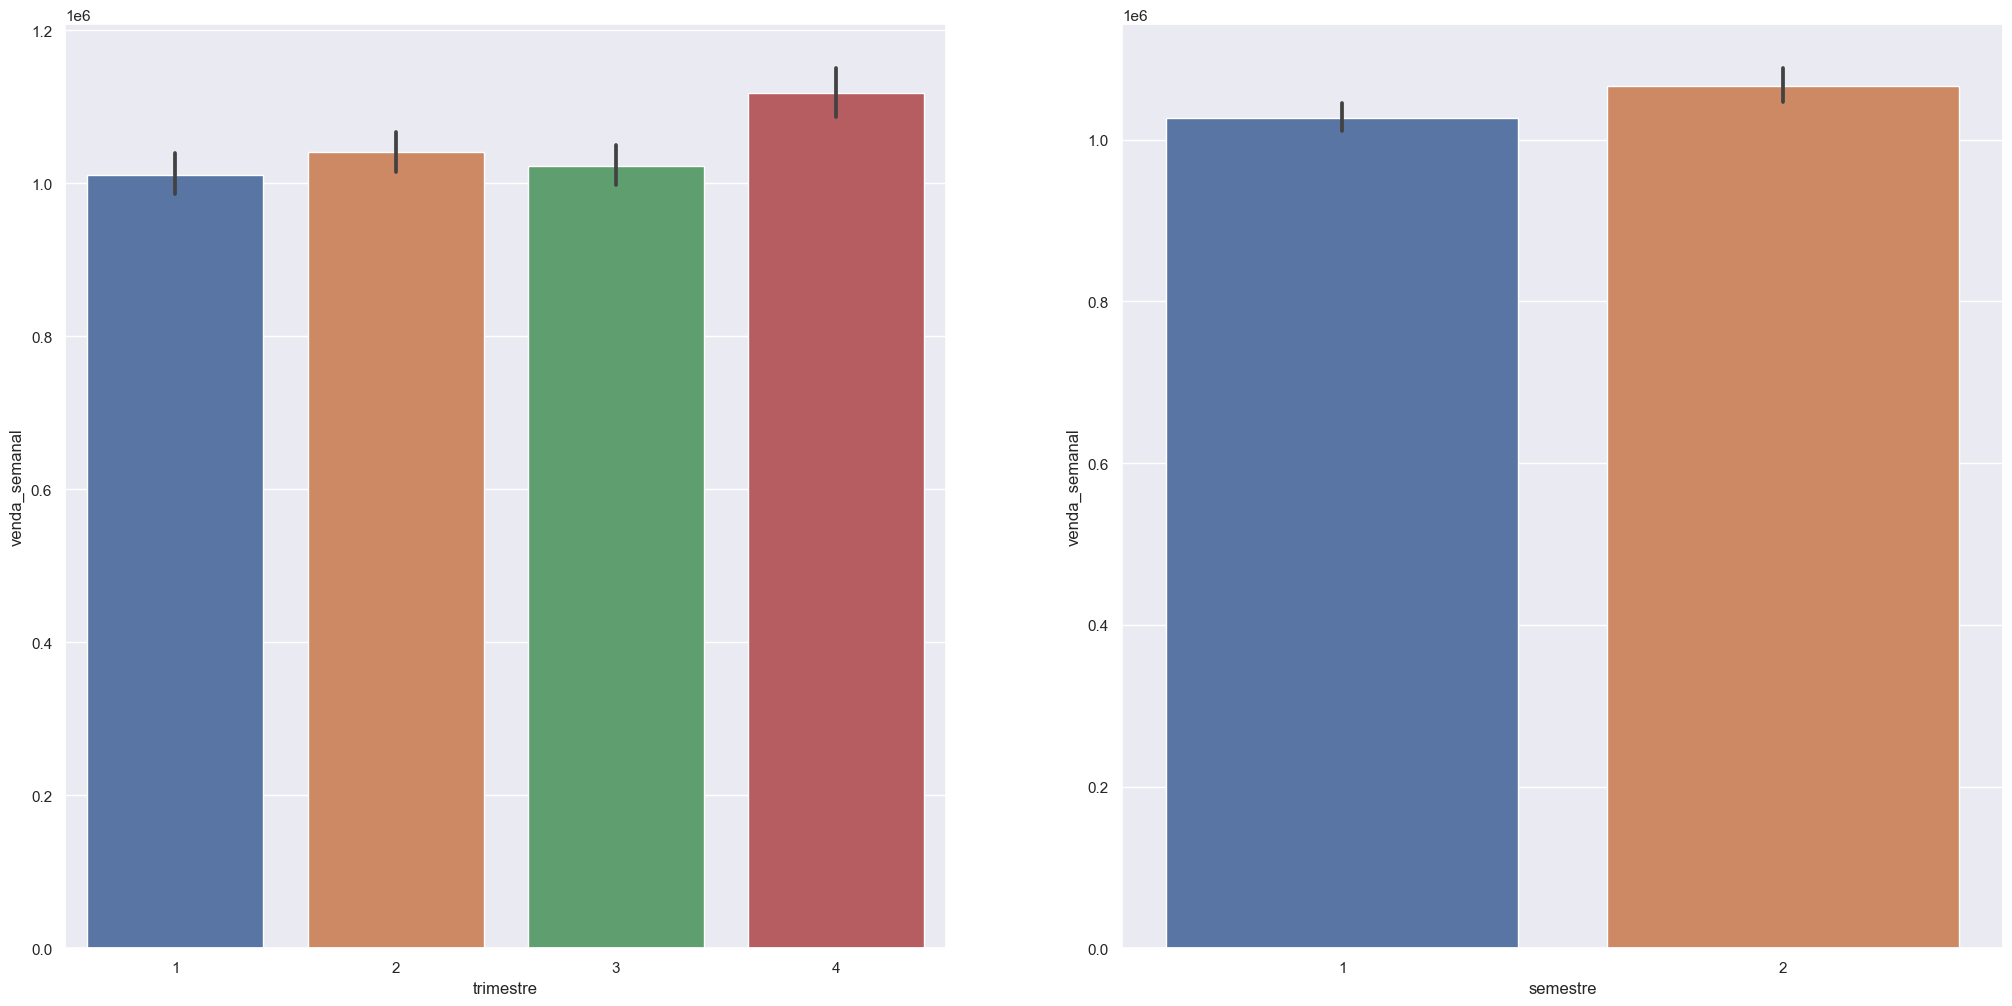

In [ ]:
# Avaliando qual semestre e trimestre vendem mais
df['semestre'] = (df['data'].dt.month - 1) // 6 + 1
df['trimestre'] = df['data'].dt.month.apply(lambda x: math.ceil(x/3))

plt.subplot( 1, 2, 1 )
sns.barplot(data=df, x='trimestre', y='venda_semanal')

plt.subplot( 1, 2, 2 )
sns.barplot(data=df, x='semestre', y='venda_semanal')

## Análise Multivariada 

<AxesSubplot: >

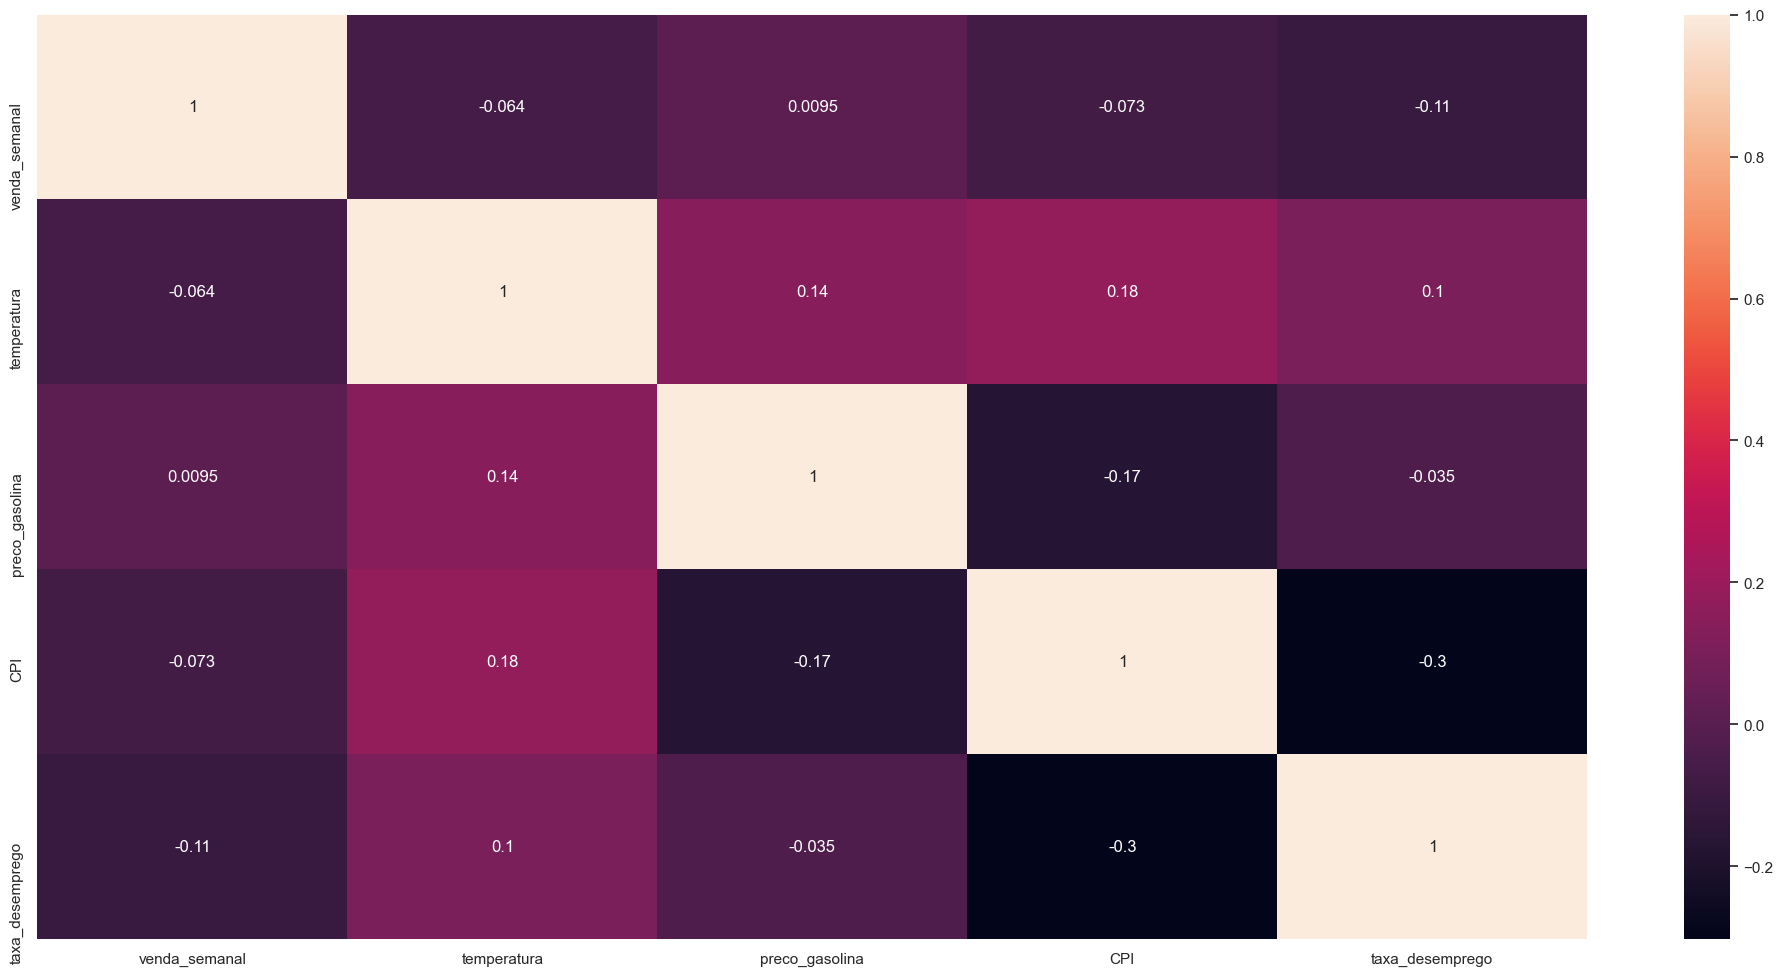

In [ ]:
sns.heatmap(num_attributes.corr('pearson'), annot=True)

# Iniciando a modelagem

Separação entre dados de Treino e teste, deixando as últimas 7 semanas para teste.

In [ ]:
df2 = df.copy()

In [ ]:
df2['data'] = pd.to_datetime(df2['data'])
# training dataset
X_train = df[df['data'] < '2012-10-12']
y_train = X_train['venda_semanal']
# test dataset
X_test = df[df['data'] >= '2012-10-12']
y_test = X_test['venda_semanal']
print( 'Training Min Date: {}'.format( X_train['data'].min() ) )
print( 'Training Max Date: {}'.format( X_train['data'].max() ) )
print( '\nTest Min Date: {}'.format( X_test['data'].min() ) )

Training Min Date: 2010-01-10 00:00:00
Training Max Date: 2012-10-08 00:00:00

Test Min Date: 2012-10-19 00:00:00


In [ ]:
# Retira a variável data para passar pelos algoritmos
X_train = X_train.drop('data',axis = 1)
X_test = X_test.drop('data',axis = 1)

#Retira a variável alvo do X_test
X_test = X_test.drop('venda_semanal', axis = 1)
X_train = X_train.drop(['venda_semanal'], axis=1)

### Normalização, Rescaling e Transformações

In [ ]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = RobustScaler()
# treinando a scaler apenas em dados de treino, para evitar Data Leakage
scaler.fit(X_train[['taxa_desemprego']])

# aplicando o scaler nos dados de treino e test
X_train_scaled['taxa_desemprego'] = scaler.transform(X_train[['taxa_desemprego']])
X_test_scaled['taxa_desemprego'] = scaler.transform(X_test[['taxa_desemprego']])


In [ ]:
# Para variáveis sem valores Outliers optei por aplicar um StandardScaler
colunas = ['temperatura', 'CPI', 'preco_gasolina']
scaler = StandardScaler()
scaler.fit(X_train[colunas])

X_train_scaled[colunas] = scaler.transform(X_train[colunas])
X_test_scaled[colunas] = scaler.transform(X_test[colunas])

In [ ]:
#Transformando a variável resposta
y_train= np.log1p(y_train)
y_test = np.log1p(y_test)

## Feature Selection

Primeiro passo é retirar variáveis colineares, utilizei o VIF para localizá-las

In [ ]:
X = sm.add_constant(X_train_scaled)

# Calcula o VIF para cada variável
vif = pd.DataFrame()
vif["Variável"] = X_train_scaled.columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

limite_vif = 5
# Exibe as variáveis com alto VIF
print(vif[vif['VIF'] > limite_vif])

# Remove as variáveis com alto VIF
X_train_scaled = X_train_scaled.drop(vif[vif['VIF'] > limite_vif]['Variável'], axis=1)
X_test_scaled = X_test_scaled.drop(vif[vif['VIF'] > limite_vif]['Variável'], axis=1)

     Variável        VIF
9    semestre  33.558857
10  trimestre  30.528680


Encontrando as variáveis mais importantes para um modelo de regressão linear

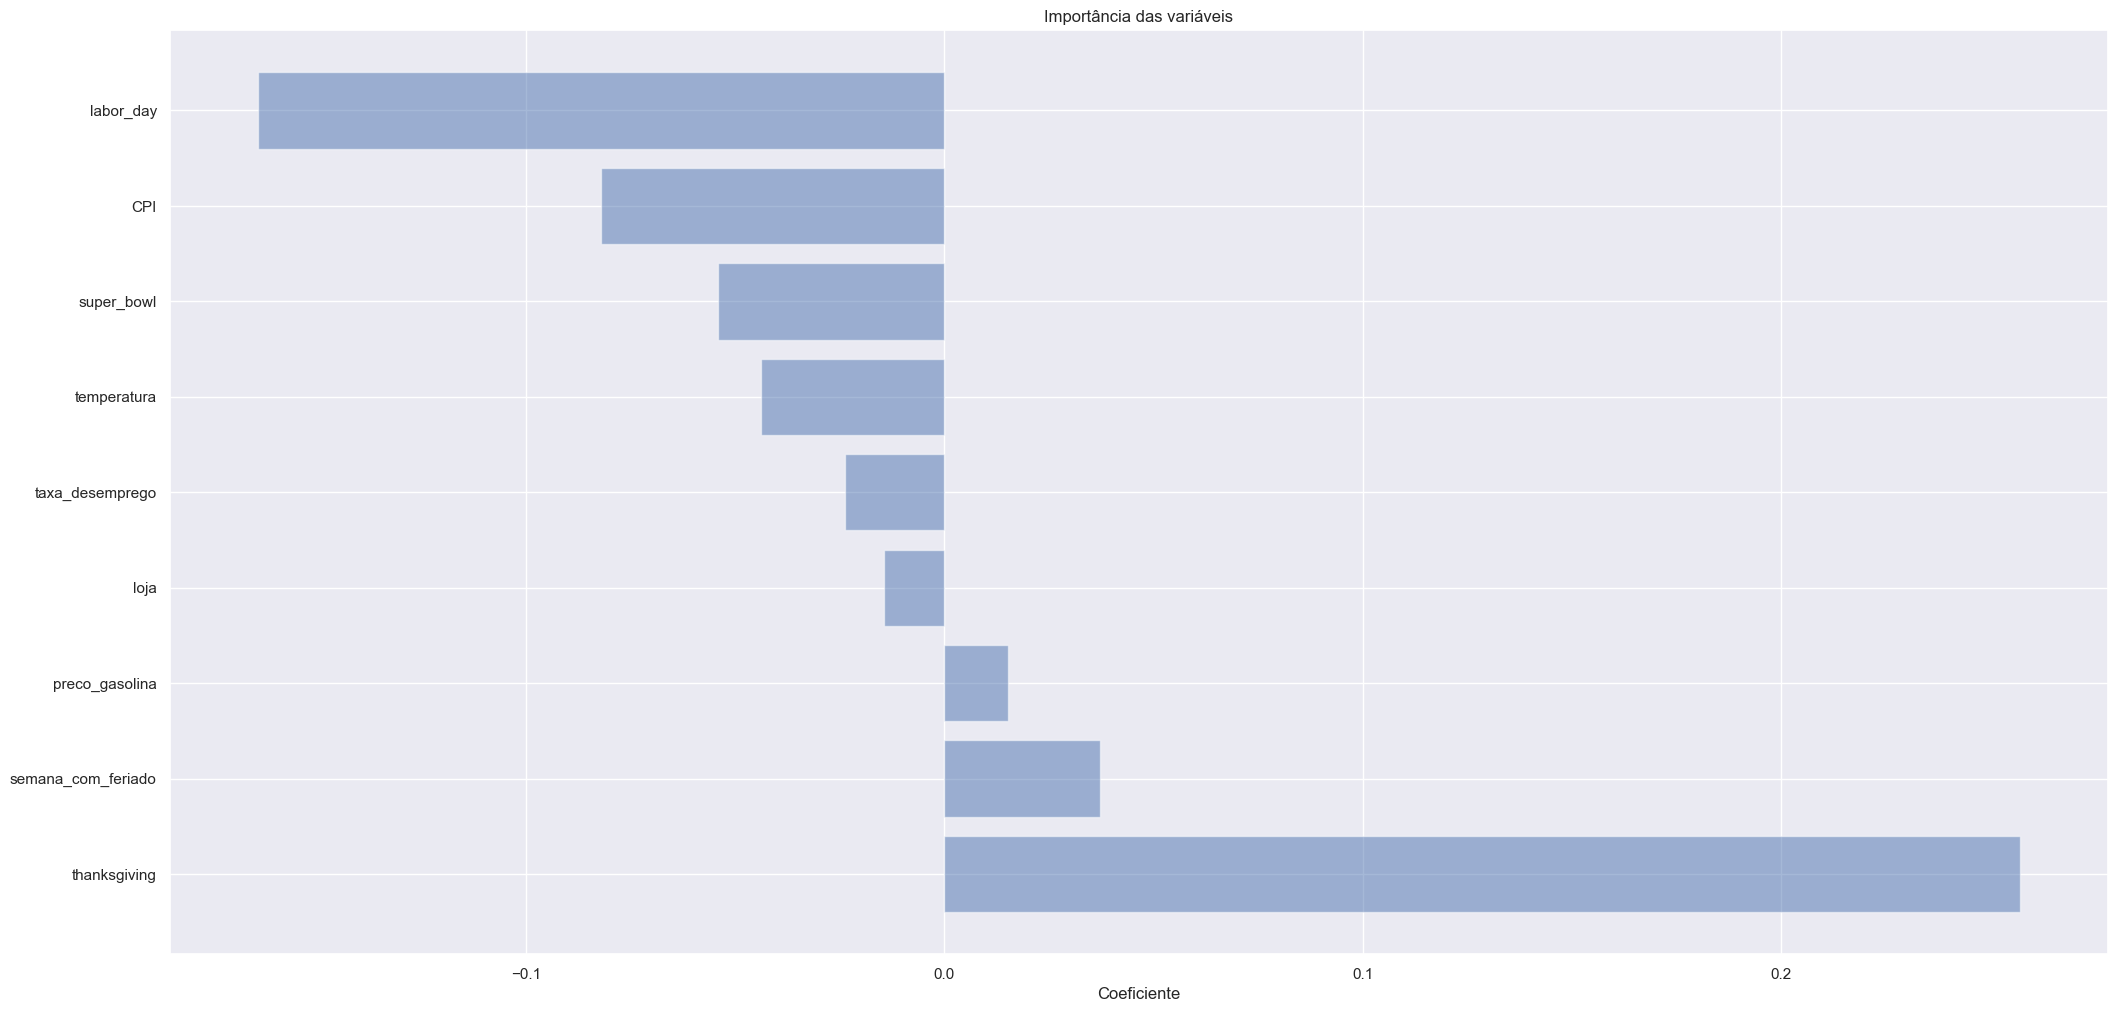

In [ ]:
#Criando uma matriz unidimensional com Numpy
y = np.ravel(y_train)

# Treina um modelo de regressão linear
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Calcula os coeficientes de regressão
coefs = model.coef_

# Calcula a significância das variáveis
_, p_values = f_regression(X_train_scaled, y_train)

# Cria um DataFrame com as variáveis e suas importâncias
importances = pd.DataFrame({'feature': X_train_scaled.columns, 'coef': coefs, 'p_value': p_values})

# Ordena as variáveis pela importância
importances = importances.sort_values(by='coef', ascending=False)
# Define os dados para o gráfico de barras horizontais
y_pos = range(len(importances))
plt.barh(y_pos, importances['coef'], align='center', alpha=0.5)
plt.yticks(y_pos, importances['feature'])
plt.xlabel('Coeficiente')
plt.title('Importância das variáveis')
# Exibe o gráfico
plt.show()


# Treinamento de modelo

In [ ]:
# instanciar o modelo de regressão linear
model = LinearRegression()

# ajustar o modelo aos dados de treinamento
model.fit(X_train_scaled, y_train)

# fazer as previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

#calcular a acurácia do modelo
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
mae = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
mape = mean_absolute_percentage_error(np.expm1(y_test), np.expm1(y_pred))
lr_results = pd.DataFrame( { 'Modelo':'Regressão Linear', 'MAE': mae, 'MAPE': mape, 'RMSE': rmse }, index=[0] )
lr_results.head()

,Modelo,MAE,MAPE,RMSE
0,Regressão Linear,404243.837926,0.519317,491724.391296


In [ ]:
# instanciar o modelo de Random Forest
model = RandomForestRegressor()

# ajustar o modelo aos dados de treinamento
model.fit(X_train_scaled, y_train)

# fazer as previsões no conjunto de teste
rf_y_pred = model.predict(X_test_scaled)

# calcular a acurácia do modelo
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
mae = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
mape = mean_absolute_percentage_error(np.expm1(y_test), np.expm1(y_pred))

rf_results = pd.DataFrame( { 'Modelo':'Random Forest', 'MAE': mae, 'MAPE': mape, 'RMSE': rmse }, index=[0] )
rf_results.head()

,Modelo,MAE,MAPE,RMSE
0,Random Forest,404243.837926,0.519317,491724.391296


In [ ]:
import xgboost as xgb
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'random_state': 42
}

# Instanciar o modelo XGBoostRegressor
model = xgb.XGBRegressor(**params)

# Treinar o modelo
model.fit(X_train_scaled, y_train)

# Fazer as previsões nos dados de teste
y_pred = model.predict(X_test_scaled)

# Calcular as métricas de avaliação do modelo
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
mae = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
mape = mean_absolute_percentage_error(np.expm1(y_test), np.expm1(y_pred))

xgb_results = pd.DataFrame( { 'Modelo':'XgBoost', 'MAE': mae, 'MAPE': mape, 'RMSE': rmse }, index=[0] )
xgb_results.head()

,Modelo,MAE,MAPE,RMSE
0,XgBoost,72863.029333,0.079538,98873.18094


# Tuning de Hiperparâmetros

O modelo selecionado para resolver o problema foi a Xgboost por apresentar menores valores de erros , o próximo passo é verificar se a tunagem irá melhorar ainda mais o desempenho do modelo.

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform

# # Definir os parâmetros a serem testados
# params = {
#     'objective': ['reg:squarederror'],
#     'learning_rate': uniform(0.01, 0.3),  # intervalo entre 0.01 e 0.3
#     'max_depth': randint(3, 10),  # intervalo entre 3 e 10
#     'n_estimators': randint(100, 1000),  # intervalo entre 100 e 1000
#     'subsample': uniform(0.5, 0.5),  # intervalo entre 0.5 e 1
#     'colsample_bytree': uniform(0.5, 0.5),  # intervalo entre 0.5 e 1
#     'reg_alpha': uniform(0, 1),  # intervalo entre 0 e 1
#     'reg_lambda': uniform(0, 1),  # intervalo entre 0 e 1
#     'random_state': [42]
# }

# # Instanciar o modelo XGBoostRegressor
# model = xgb.XGBRegressor()

# # Criar o objeto RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     model, params, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# # Treinar o modelo usando o objeto RandomizedSearchCV
# random_search.fit(X_train_scaled, y_train)

# # Imprimir os melhores parâmetros e a melhor pontuação
# print("Melhores parâmetros: ", random_search.best_params_)
# print("Melhor RMSE: ", np.sqrt(-random_search.best_score_))


Após a realização de um Random Search, foi possível chegar nos parâmetros abaixo para melhorar o desempenho do modelo 

In [ ]:
params = {'colsample_bytree': 0.9015, 
          'learning_rate': 0.1510, 
          'max_depth': 4, 
          'n_estimators': 297, 
          'objective': 'reg:squarederror', 
          'random_state': 42, 
          'reg_alpha': 0.3988, 
          'reg_lambda': 0.8164, 
          'subsample': 0.8991}

# Instanciar o modelo XGBoostRegressor
model = xgb.XGBRegressor(**params)

# Treinar o modelo
model.fit(X_train_scaled, y_train)

# Fazer as previsões nos dados de teste
xgb_tuned_pred = model.predict(X_test_scaled)

# Calcular as métricas de avaliação do modelo
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
mae = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
mape = mean_absolute_percentage_error(np.expm1(y_test), np.expm1(y_pred))

xgb_results_tunada = pd.DataFrame( { 'Modelo':'XgBoost tunada', 'MAE': mae, 'MAPE': mape, 'RMSE': rmse }, index=[0] )
xgb_results_tunada.head()

,Modelo,MAE,MAPE,RMSE
0,XgBoost tunada,72863.029333,0.079538,98873.18094


Após encontrar os melhores parâmetros, irei retreinar a Xgboost, criar uma comparação entre todos os modelos e avaliar qual apresenta um resultado melhor. 

In [ ]:
modelling_result_cv = pd.concat( [lr_results, rf_results,xgb_results, xgb_results_tunada] )
modelling_result_cv.sort_values('MAE')

,Modelo,MAE,MAPE,RMSE
0,XgBoost,72863.029333,0.079538,98873.180940
0,XgBoost tunada,72863.029333,0.079538,98873.180940
0,Regressão Linear,404243.837926,0.519317,491724.391296
0,Random Forest,404243.837926,0.519317,491724.391296


Podemos observar que o modelo se manteve após a tunagem, isso talvez tenha ocorrido porque eu realizei uma random search, onde a busca pela melhor combinação é aleatória, mas ainda vale mais a pena em questões performáticas do que uma Grid Search.

# Interpretação e Tradução do Erro

In [ ]:
#Criando um DF unindo variáveis independentes e variável alvo, para efeito de análise
df9 = pd.concat([X_test_scaled, y_test], axis=1)

#Retornando a variável alvo e predição para mesma escala.
df9['venda_semanal'] = np.expm1(df9['venda_semanal'])
df9['predicao'] = np.expm1(xgb_tuned_pred)

In [ ]:
#soma das predições por loja
df91 = df9[['loja','venda_semanal', 'predicao']].groupby( 'loja' ).sum().reset_index()
df91.head()

,loja,venda_semanal,predicao
0,1,6185897.37,5922675.500
1,2,7500714.88,7343054.500
2,3,1672735.53,1692340.500
3,4,8507548.55,8698770.000
4,5,1292124.85,1343579.125


Nessa etapa inclui o MAE e o MAPE no dataframe para facilitar a leitura e visualização

In [ ]:
# MAE and MAPE
df9_aux1 = df9[['loja', 'venda_semanal', 'predicao']].groupby( 'loja' ).apply(lambda x: mean_absolute_error( x['venda_semanal'], x['predicao'].values ) ).reset_index().rename( columns={0:'MAE'})
df9_aux2 = df9[['loja', 'venda_semanal', 'predicao']].groupby( 'loja' ).apply(lambda x: mean_absolute_percentage_error( x['venda_semanal'], x['predicao'].values ) ).reset_index().rename( columns={0:'MAPE'})
df9_aux3 = pd.merge( df9_aux1, df9_aux2, how='inner', on='loja' )
df92 = pd.merge( df91, df9_aux3, how='inner', on='loja' )

Para analisar a tabela abaixo, precisamos entender o que representa o MAE e o MAPE

MAE: representa o erro absoluto em questões financeiras para mais ou menos, então no melhor cenário nós subtraimos o MAE da predição e no pior cenário somamos o erro. 

MAPE: essa medida ajuda a entender a proporção do erro, o MAPE representa quantos % o MAE representa do valor real (venda semanal), no caso da loja 3 por exemplo o nosso modelo errou em um range de 2,8% do que realmente aconteceu, sendo um resultado muito bom .

In [ ]:
df92.sort_values('MAE')

,loja,venda_semanal,predicao,MAE,MAPE
28,29,2095324.79,2084862.625,4435.556562,0.008323
2,3,1672735.53,1692340.500,11993.470312,0.028940
4,5,1292124.85,1343579.125,13371.750625,0.041963
43,44,1364011.05,1333311.125,15020.398437,0.043380
24,25,2811656.36,2739881.750,17943.668125,0.025002
29,30,1747625.50,1819903.375,18069.468750,0.041352
42,43,2471051.54,2523959.250,18811.978750,0.031325
5,6,5844782.84,5889435.000,19554.298750,0.013167
14,15,2245465.95,2322431.000,20377.784375,0.036668
33,34,3818743.00,3739242.000,22211.833750,0.023204


Abaixo está a visualização comparando o que o nosso modelo previu e o que realmente aconteceu, podemos ver que a performance foi relativamente boa.

<AxesSubplot: xlabel='data', ylabel='venda_semanal'>

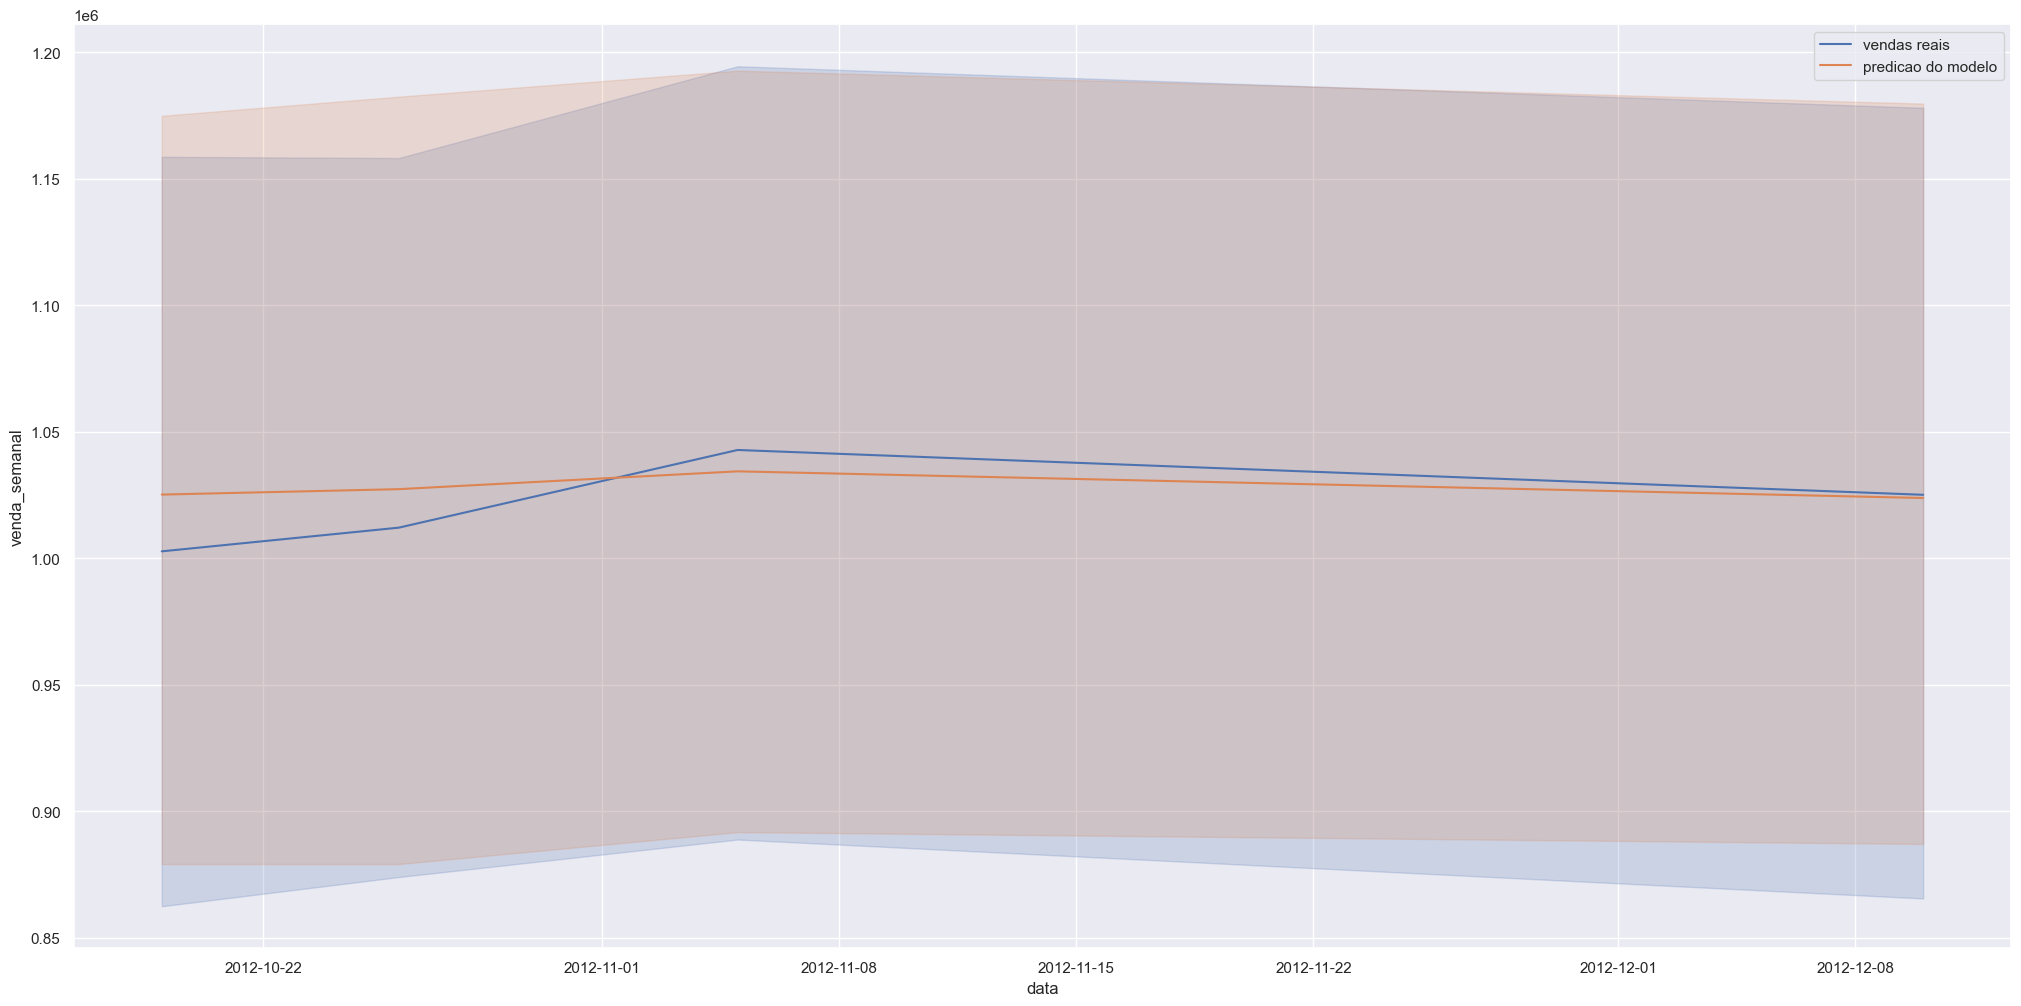

In [ ]:
sns.lineplot( x=df['data'], y='venda_semanal', data=df9, label='vendas reais' )
sns.lineplot( x=df['data'], y='predicao', data=df9, label='predicao do modelo' )